# Переобучение

На этом уроке мы поговорим про переобучение. И рассмотрим несколько основных вопросов:  
- Что такое переобучение?  
- Как выявить переобучение?  
- И как бороться с переобучением?  

## Что такое переобучение? 

Для начала, можно перевести аналогию из жизни. Перед студентом стоит задача подготовиться к экзамену. Он смотрит некоторые примеры, и как они решаются. Тогда многие студента будут выводить какие-либо закономерности решения задачи. Понимать ход мысли для ее решения. Или же как это называется в нейронных сетях приближать функцию) Однако, есть небольшая группа студентов, которые глядя на примеры решения будут пытаться их запомнить. И это будет очень плохой подход, потому что шанс того, что задачи будут на экзамене точно такие же крайне мал. Эта группа студентов не старается понять логику решения, они стараются запомнить задачу и ответ к ней, поэтому такие студенты не смогут показать каких-либо хороших результатов на экзамене.

А теперь, если применить это к нейронным сетям, легко догадаться, что нейронные сети тоже могут переобучаться (overfitting). И как группа студентов из прошлого примера запоминать просто ответы к задачам, не пытаясь вывести закономерностей.

Итак, давайте попробуем отловить такие примеры. 

![title](images/how_to_detect.jpg)

Легко сделать вывод, что **переобучение - запоминание примеров**, а не попытка их обобщить.

## Как выявить переобучение?

Для ответа на этот вопрос, давайте рассмотрим пример.

Пусть у нас будет нелинейная задача, нам нужно будет найти целевую **нелинейную** переменную $y = 2*sin(x)$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from scipy.stats import norm
import seaborn as sns

sns.set_style("dark")

In [63]:
def drawData(X,Y):
    plt.plot(X,Y,'o')
    plt.title("data points")
    plt.xlabel('x',color='#1C2833')
    plt.ylabel('y',color='#1C2833')
    plt.show()


def drawPolynom(X,Y,w, X_m=[], Y_m=[]):
    predicted = np.dot(X,w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title('fitted line')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.show()


def addNoise(Y):
    Y += norm.rvs(size=Y.shape[0])
    return Y


def generatePointsOnLine(shuffle=True, n=100):
    X = np.linspace(-3, 3, n)
    if shuffle:
        np.random.shuffle(X)
    Y = 2*np.sin(X)
    return X,Y


def generateDataset():
    X,Y = generatePointsOnLine()
    Y = addNoise(Y)
    drawData(X,Y)
    return X,Y

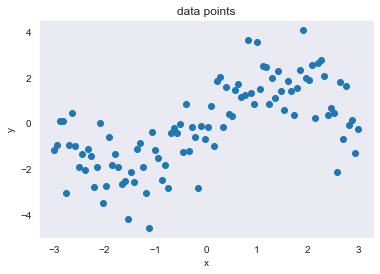

In [64]:
X_gen, Y = generateDataset()

Нашей задачей будет график выше. Грубо говоря приблизить функцию.

И если линейная модель выглядит как $w_1x + w_0$. То с помощью нее мы сможем нарисовать линию, однако это будет не наша целевая функция $y = 2*sinx$. Давайте попробуем это сделать все же.

In [65]:
def addFeatures(X, p):
    for i in range(1, p):
        X = np.hstack((X,(X[:,0].reshape((X[:,0].shape[0],1)))**(i + 1)))

    X = np.hstack((X,np.ones((X.shape[0],1))))
    return X


def trainTestSplit(X,Y, p=4):
    X = X.reshape(X.shape[0],1)
    Y = Y.reshape(Y.shape[0],1)
    X = addFeatures(X, p)
    
    train_size = int(X.shape[0] * 0.8)
    X_train = X[0:train_size,:]
    Y_train = Y[0:train_size,:]
    X_test = X[train_size:,:]
    Y_test = Y[train_size:,:]
    return X, X_train,Y_train, X_test,Y_test

In [66]:
def computePseudoInverse(X,Y):
    w = np.dot(np.dot(linalg.inv((np.dot(X.T,X))), X.T),Y)
    return w


def computeTestError(X_test, Y_test, w):
    return np.mean(np.abs(np.dot(X_test, w) - Y_test))

In [67]:
X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, 1)
X_m, Y_m = generatePointsOnLine(shuffle=False)

Test error:  1.0734810204659444


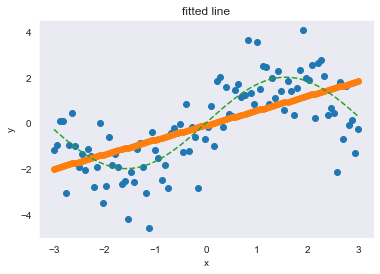

In [68]:
w = computePseudoInverse(X_train, Y_train)
print("Test error: ", computeTestError(X_test, Y_test, w))
drawPolynom(X, Y, w, X_m, Y_m)

Вот так выглядит наша модель. Тогда давайте попробуем усилить нашу модель, добавив степени к x. То есть будем брать полином с коэффицентами. Выглядеть это будет вот так: $w_0 + w_1x^1 + w_2x^2 + ...  + w_nx^n$. Что это нам позволит? Он позволит функции как бы изгибаться, что нам и нужно.

И для примера возьмем полином 3 степени: $w_0 + w_1x^1 + w_2x^2+w_3x^3$

In [69]:
X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, 3)
X_m, Y_m = generatePointsOnLine(shuffle=False)

Test error:  0.7269550294368374


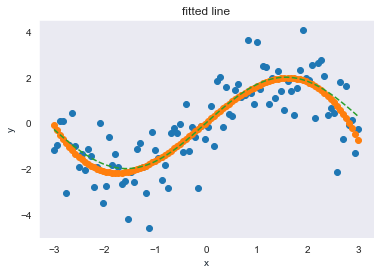

In [70]:
w = computePseudoInverse(X_train, Y_train)
print("Test error: ", computeTestError(X_test, Y_test, w))
drawPolynom(X, Y, w, X_m, Y_m)

Отлично, наш график почти совпадает с целевой функцией. Именно это ведь мы и хотели? 

Тогда напрашивается вопрос, что будет если взять не 3, а 4 степень? 10? 100? Получается, чем больше, тем лучше? Давайте проверим.

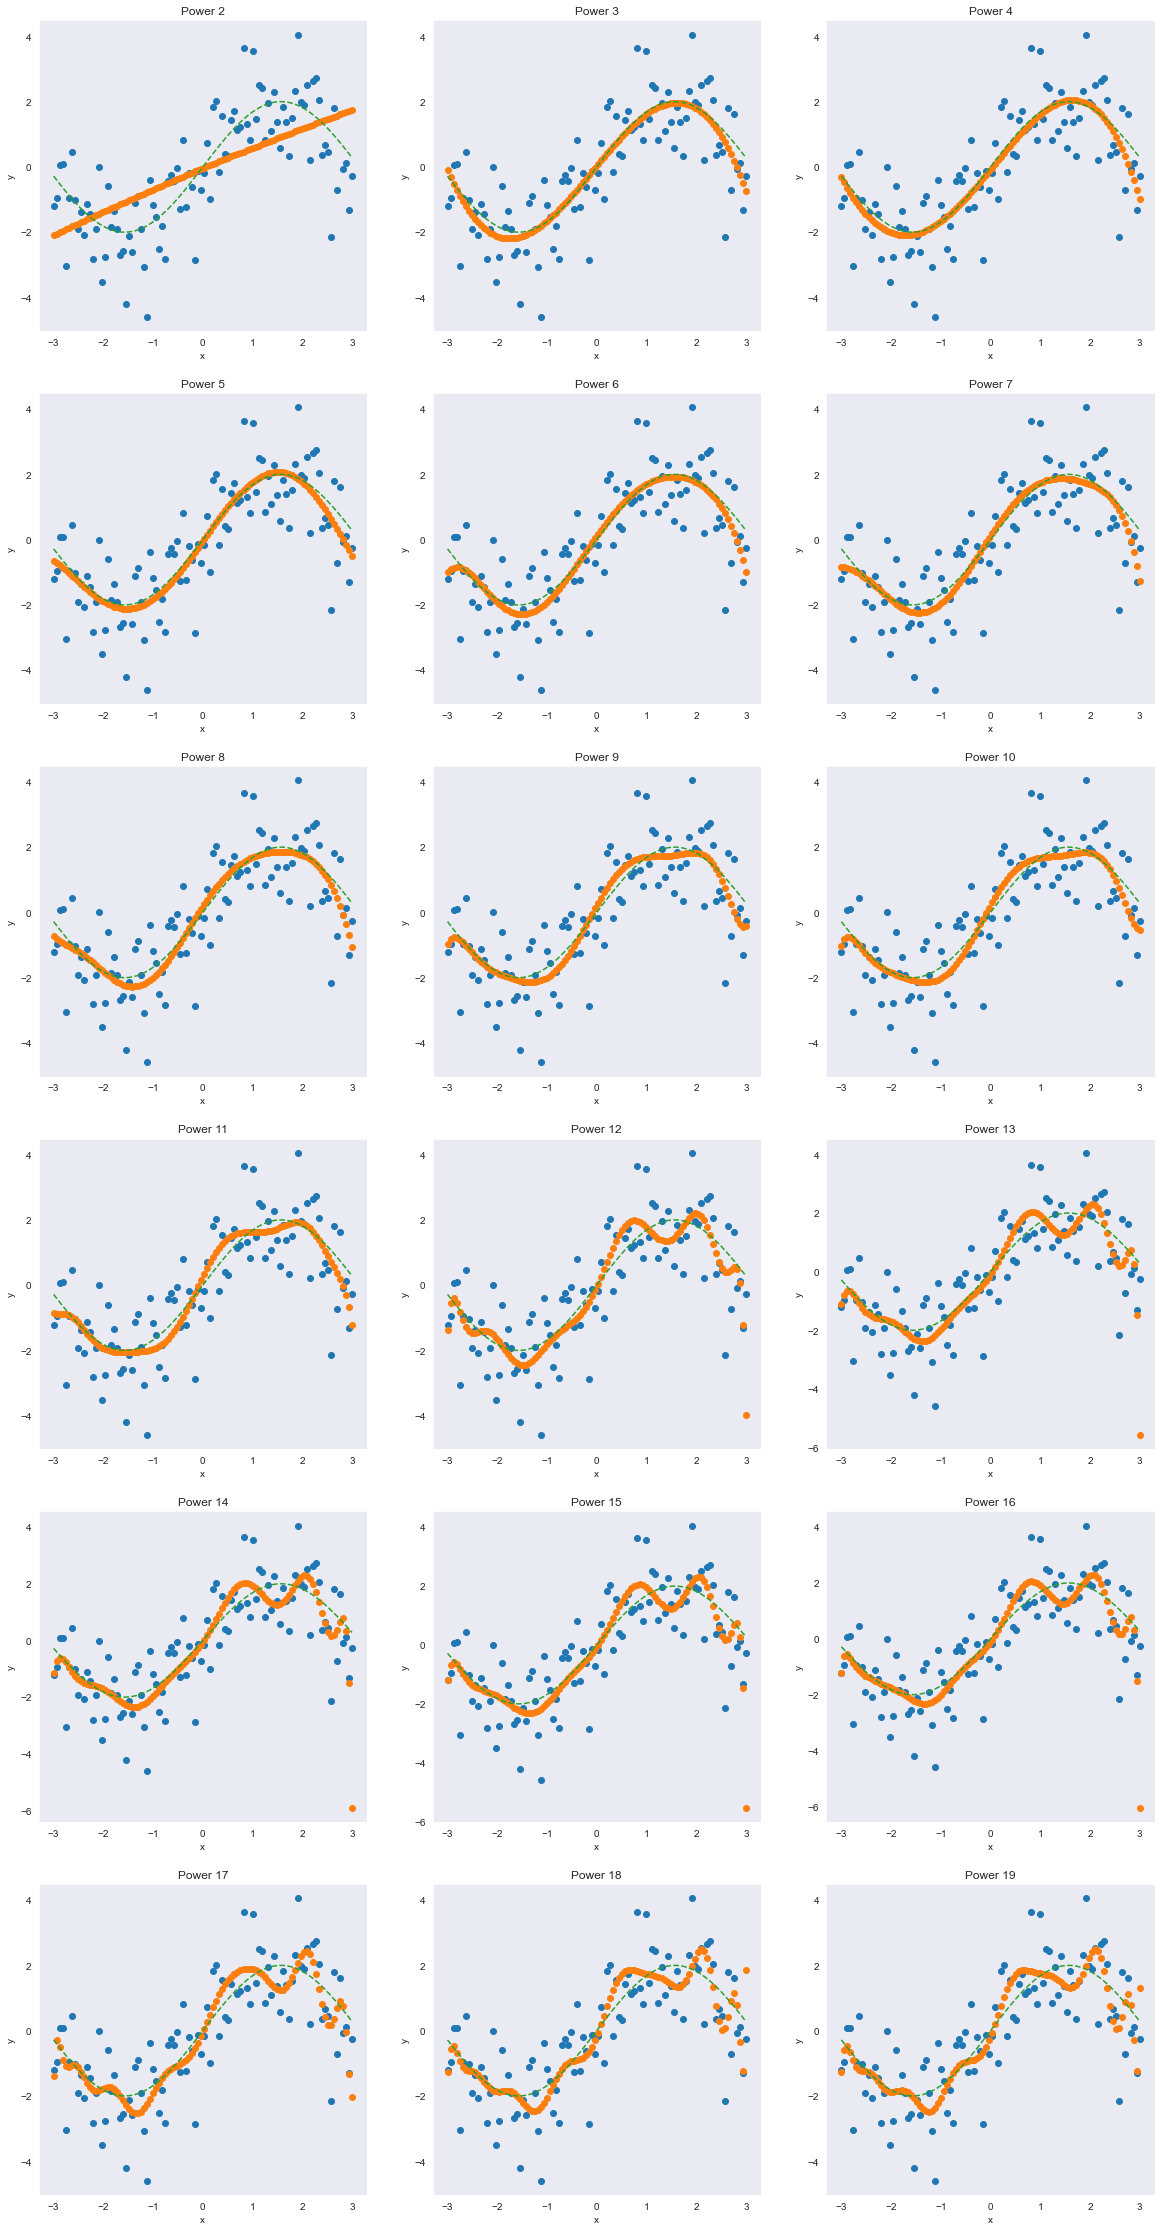

In [96]:
plt.figure(figsize=(20,40))
test_err = np.zeros(19)
train_err = np.zeros(19)
w_list = []
for p in range(1, 19):
    X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, p+1)
    w = computePseudoInverse(X_train, Y_train)
    train_err[p] = computeTestError(X_train, Y_train, w)
    test_err[p] = computeTestError(X_test, Y_test, w)
    w_list.append(w)
    
    plt.subplot(6,3,p)
    plt.grid(False)
    predicted = np.dot(X, w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title("Power "+str(p+1))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
plt.show()

Как вы уже поняли, мы столкнулись с переобучением.

**Что произойдет, если взять 100 степень? (Столько же, сколько у нас точек есть на графике)**

In [87]:
X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, 25)
X_m, Y_m = generatePointsOnLine(shuffle=False)

Test error:  1.3307026220194438


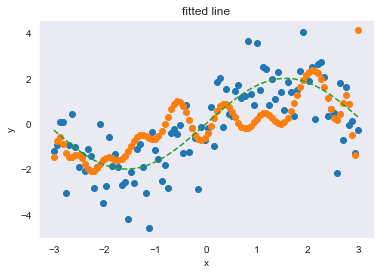

In [88]:
w = computePseudoInverse(X_train, Y_train)
print("Test error: ", computeTestError(X_test, Y_test, w))
drawPolynom(X, Y, w, X_m, Y_m)

#### Так как же нам выявить переобучение?

*Во-первых* самое очевидное, это еще с самого начала урока, мы поняли, что на новых данных наша модель будет работать хуже. Потому что она запоминает, а не обобщает. Соответственно, напрашивается сравнить качество ошибки на тренировочных и тестовых данных.

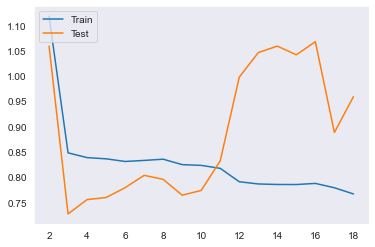

In [89]:
plt.plot(range(2, 19), train_err[1:], label='train_error')
plt.plot(range(2, 19), test_err[1:], label='test_error')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Как мы можем заметить на тренировочных данных модель становится все лучше и лучше, оно и понятно. Она просто изгибается так, чтобы попасть во все точки. Однако на тестовых данных начиная с 3 степени ошибка уже начинает расти.

*Во-вторых*, менее очевидно, однако самый популярный критерий для определения переобучения является размер весов. Это не сложно понять, ведь модель изменяет веса, чтобы запомнить данные. Поэтому ее веса будут очень странно большие.

In [97]:
def trainTestSplit(X,Y, p=4):
    X = X.reshape(X.shape[0],1)
    Y = Y.reshape(Y.shape[0],1)
    X = addFeatures(X, p)
    train_size = int(X.shape[0] * 0.2)
    X_train = X[0:train_size,:]
    Y_train = Y[0:train_size,:]
    X_test = X[train_size:,:]
    Y_test = Y[train_size:,:]
    return X, X_train,Y_train, X_test,Y_test

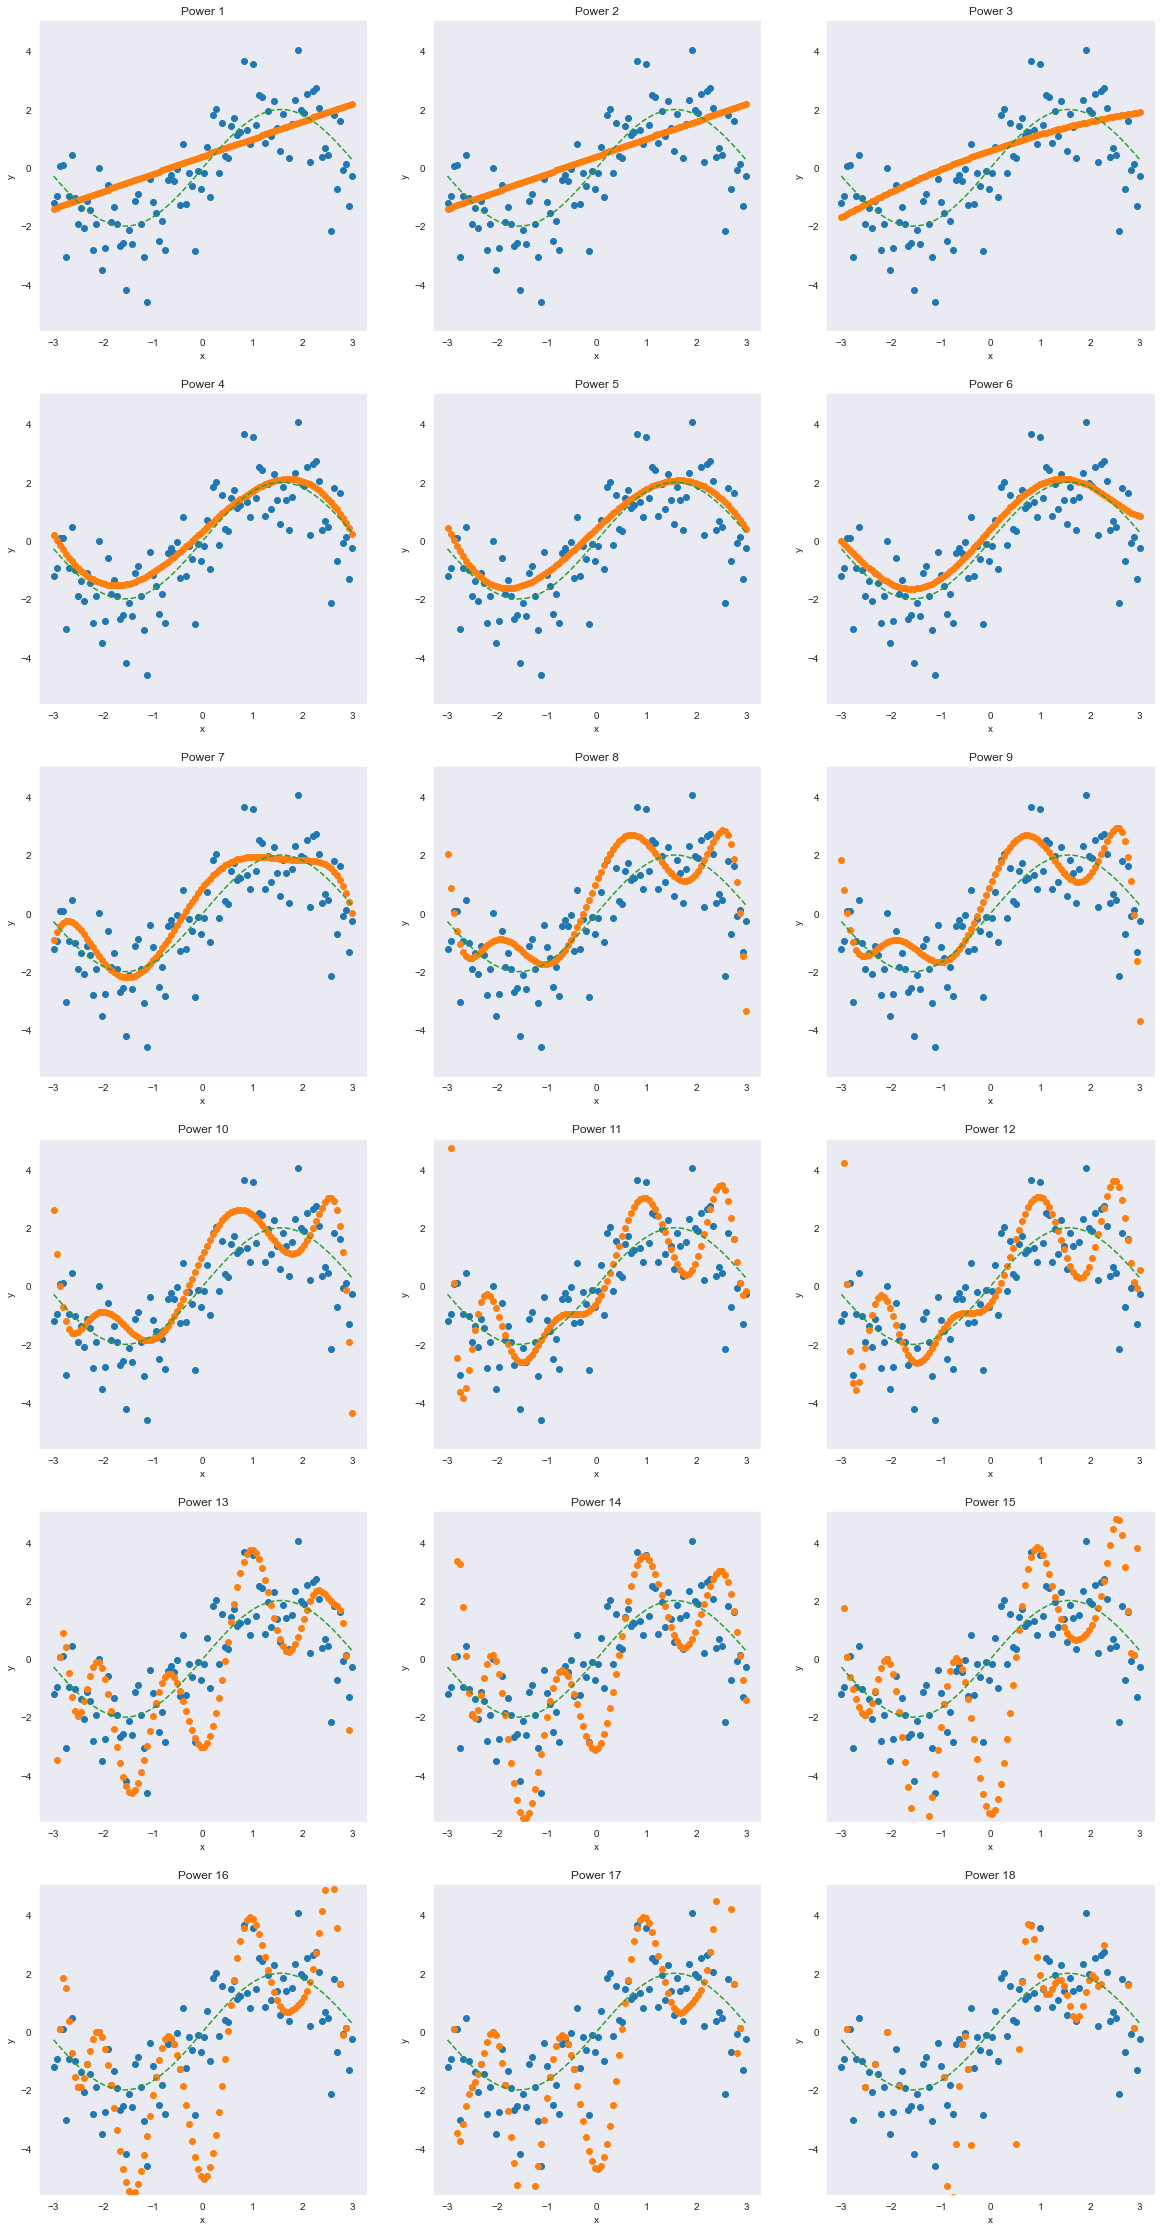

In [98]:
plt.figure(figsize=(20,40))
test_err = np.zeros(18)
train_err = np.zeros(18)
w_list = []
for p in range(18):
    X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, p)
    w = computePseudoInverse(X_train, Y_train)
    w_list.append(w)
    train_err[p] = computeTestError(X_train, Y_train, w)
    test_err[p] = computeTestError(X_test, Y_test, w)
    
    X_w = np.linspace(-3, 3, 100)
    X_w = X_w.reshape(X_w.shape[0],1)
    X_w = addFeatures(X_w, p)
    
    plt.subplot(6,3,p+1)
    plt.grid(False)
    axes = plt.gca()
    axes.set_ylim([min(Y)-1,max(Y)+1])
    predicted = np.dot(X_w, w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X_w[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title("Power "+str(p+1))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
plt.show()

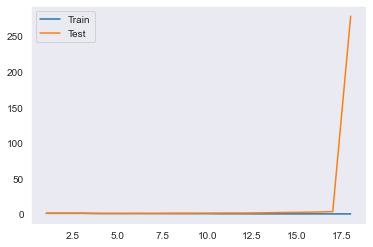

In [99]:
plt.plot(range(1, 19), train_err, label='train_error')
plt.plot(range(1, 19), test_err, label='test_error')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

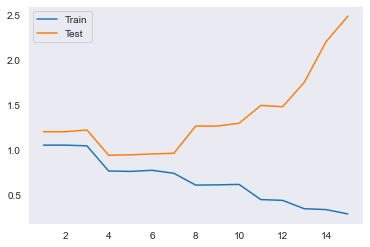

In [101]:
plt.plot(range(1, 16), train_err[:15], label='train_error')
plt.plot(range(1, 16), test_err[:15], label='test_error')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

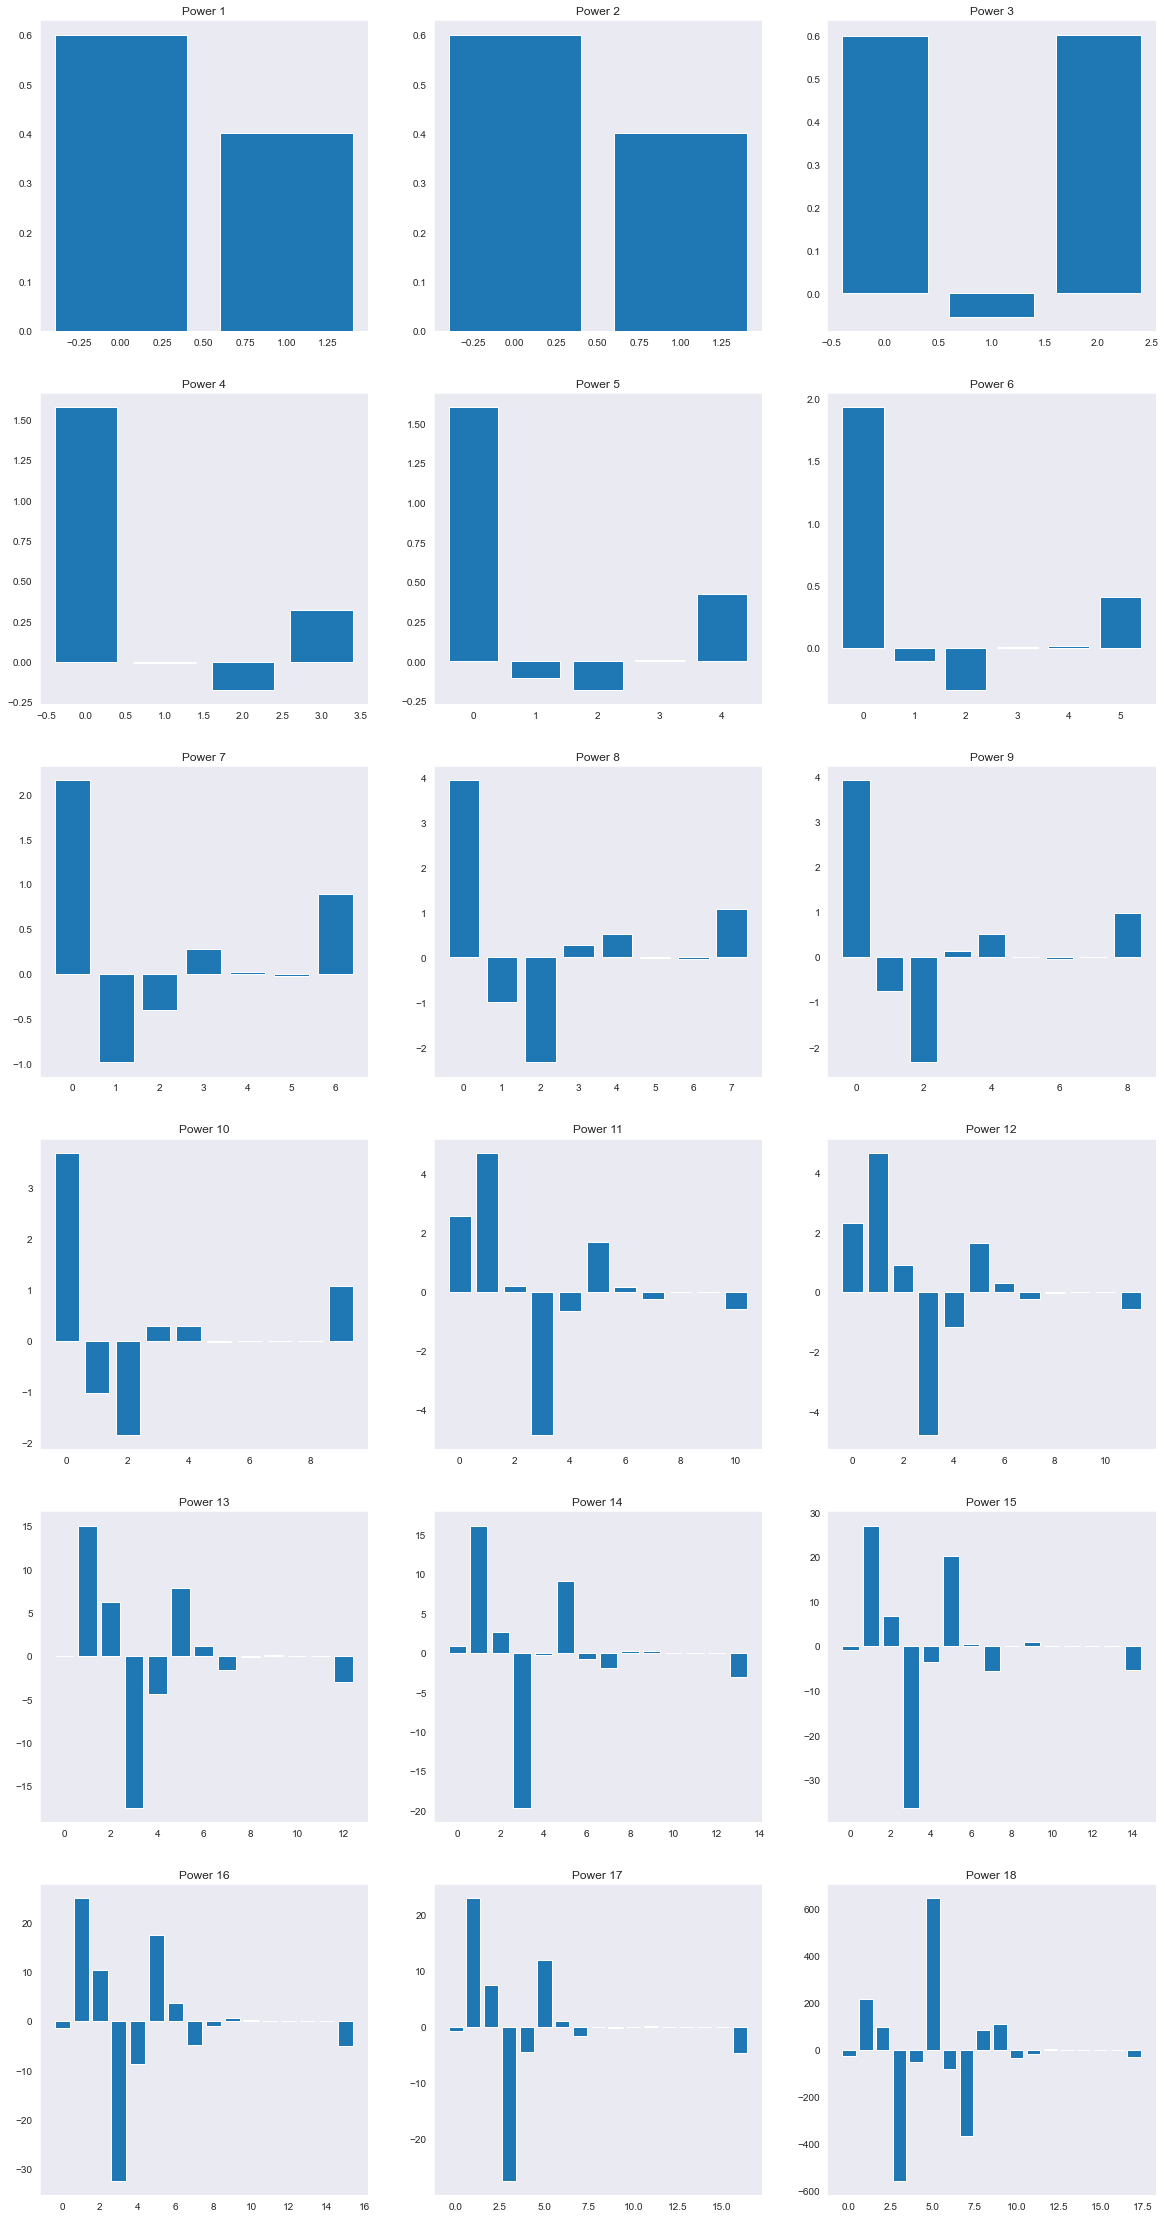

In [102]:
plt.figure(figsize=(20,40))
for p, w in enumerate(w_list):
    w = w.reshape(w.shape[0])
    
    plt.subplot(6,3,p+1)
    plt.bar(range(len(w)), w)
    plt.title("Power "+str(p+1))
plt.show()

Размер весов доходит до 600 на 18 степени. Обычно нормальные веса расположены в пределе $[0;1]$. Конечно, если вес будет равен 2 никто не говорит о переобучении, но когда все ваши веса будут иметь невероятно большую размерность, это уже повод задуматься.

**Простой пример почему большие веса это плохо**

![title](images/high_weight.jpg)

## Теперь поговорим про то, как с этим можно бороться.

#### 1) Разделение выборки на тренировочную и тестовую

Тут все логично. Если модель начнет запоминать тренировочную выборку, то мы сможем проверить ее корректность работы на тестовой. Впринципе ради этого мы и делали все это время разделение на 2 выборки. Напомню тестовая выборка - это такая выборка, которую модель не видела прежде(не использовалась в обучении).

#### 2) Увеличение количества данных

Тоже достаточно все просто, чем больше выборка - тем меньше мы позволяем отклоняться модели. Однако не всегда есть возможность увеличить выборку. Поэтому способ подойдет не для каждого случая.

## 3 ) Регуляризация

А тут все немного сложнее. Как мы выяснили ранее, модель при переобучении имеет достаточно большие веса. Так давайте мы будем ее штрафовать за эти самые большие веса. Это самый распространенный способ борьбы с переобучением на текущий момент.

Всего разделяют 2 основных вида регуляризации, давайте рассмотрим каждый из них.

### 3.1) L2 регуляризация

**Давайте сложим все наши веса и будем штрафовать нашу модель на размер данных весов**? Только возьмем еще квадрат от этой суммы, чтобы штраф был неотрицательным числом, да и за большие веса наш штраф будет огромный, вряд ли наша модель захочет делать огромные веса.

Пусть имеется целевая функция $\mathscr{Q}$. Изменим её следующим образом: 

$$Q^* = Q + \lambda \sum_{i=1}^n w^2$$

Условно, если у нас наш loss function был MSE, то тогда наша формула будет выглядеть следующим образом.

$$Q^* = \frac{1}{\ell} \sum_{i=1}^{\ell} (y_i-a_i)^2 + \lambda \sum_{i=1}^n w^2$$

Хотя и выглядит она достаточно сложной, на деле все очень просто. Мы в нашу loss функцию прибавляем просто квадрат суммы весов.

Тогда возникает вопрос, а что такое $\lambda$ ? Это некий коэффицент, показывающий с какой силой мы будем штрафовать нашу модель. Условно возьмем слишком маленькую $\lambda$ и модель не обратит внимание на данный штраф. А взять большой - модели будет не выгодно подстраиваться под левую часть уравнения, ведь любое отклонение весов от нуля будет за собой иметь слишком большой штраф, поэтому в таком случае модель примет решение - обнулить все веса (так будет математически выгоднее).

Этот параметр настраивается вручную, возможно методом подбора, или поиском лучшего. **Параметры, которые настраиваются вручную**, а не подбираются нашей моделью (к примеру веса подбираются нашей моделью, а не нами) **- называются гиперпараметрами**.

### 3.2) L1 регуляризация

На самом деле с L1 все достаточно просто. Мы берем не квадрат суммы как в L2, а просто модуль.

$$Q^* = Q + \lambda \sum_{i=1}^n |w|$$

Таким образом, мы как бы не так сильно бьем модель за слишком огромный вес. При этом модель все равно не хочет иметь большие веса. 

**В чем отличие от L2?**

-Так как **при L2 регуляризации** мы имеем квадрат, то **модели будет просто выгоднее уменьшать самые большие веса**.   
-В то время как **при L1 регуляризации** модели будет все равно какие веса уменьшать, поэтому **часто можно встретить зануление весов**.

*Это когда какие-то определенные веса будут близки к нулю. Это позволяет понять, что например признак при расчете не очень важен, возможно от него можно было бы и отказаться вовсе.*

## Давайте применим L2 регуляризацию к нашим примерам

Формула для нахождения весов

$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y} \end{array}$

In [103]:
def computePseudoInverseRegularization(X,Y, lmbd):
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), Y)
    return w

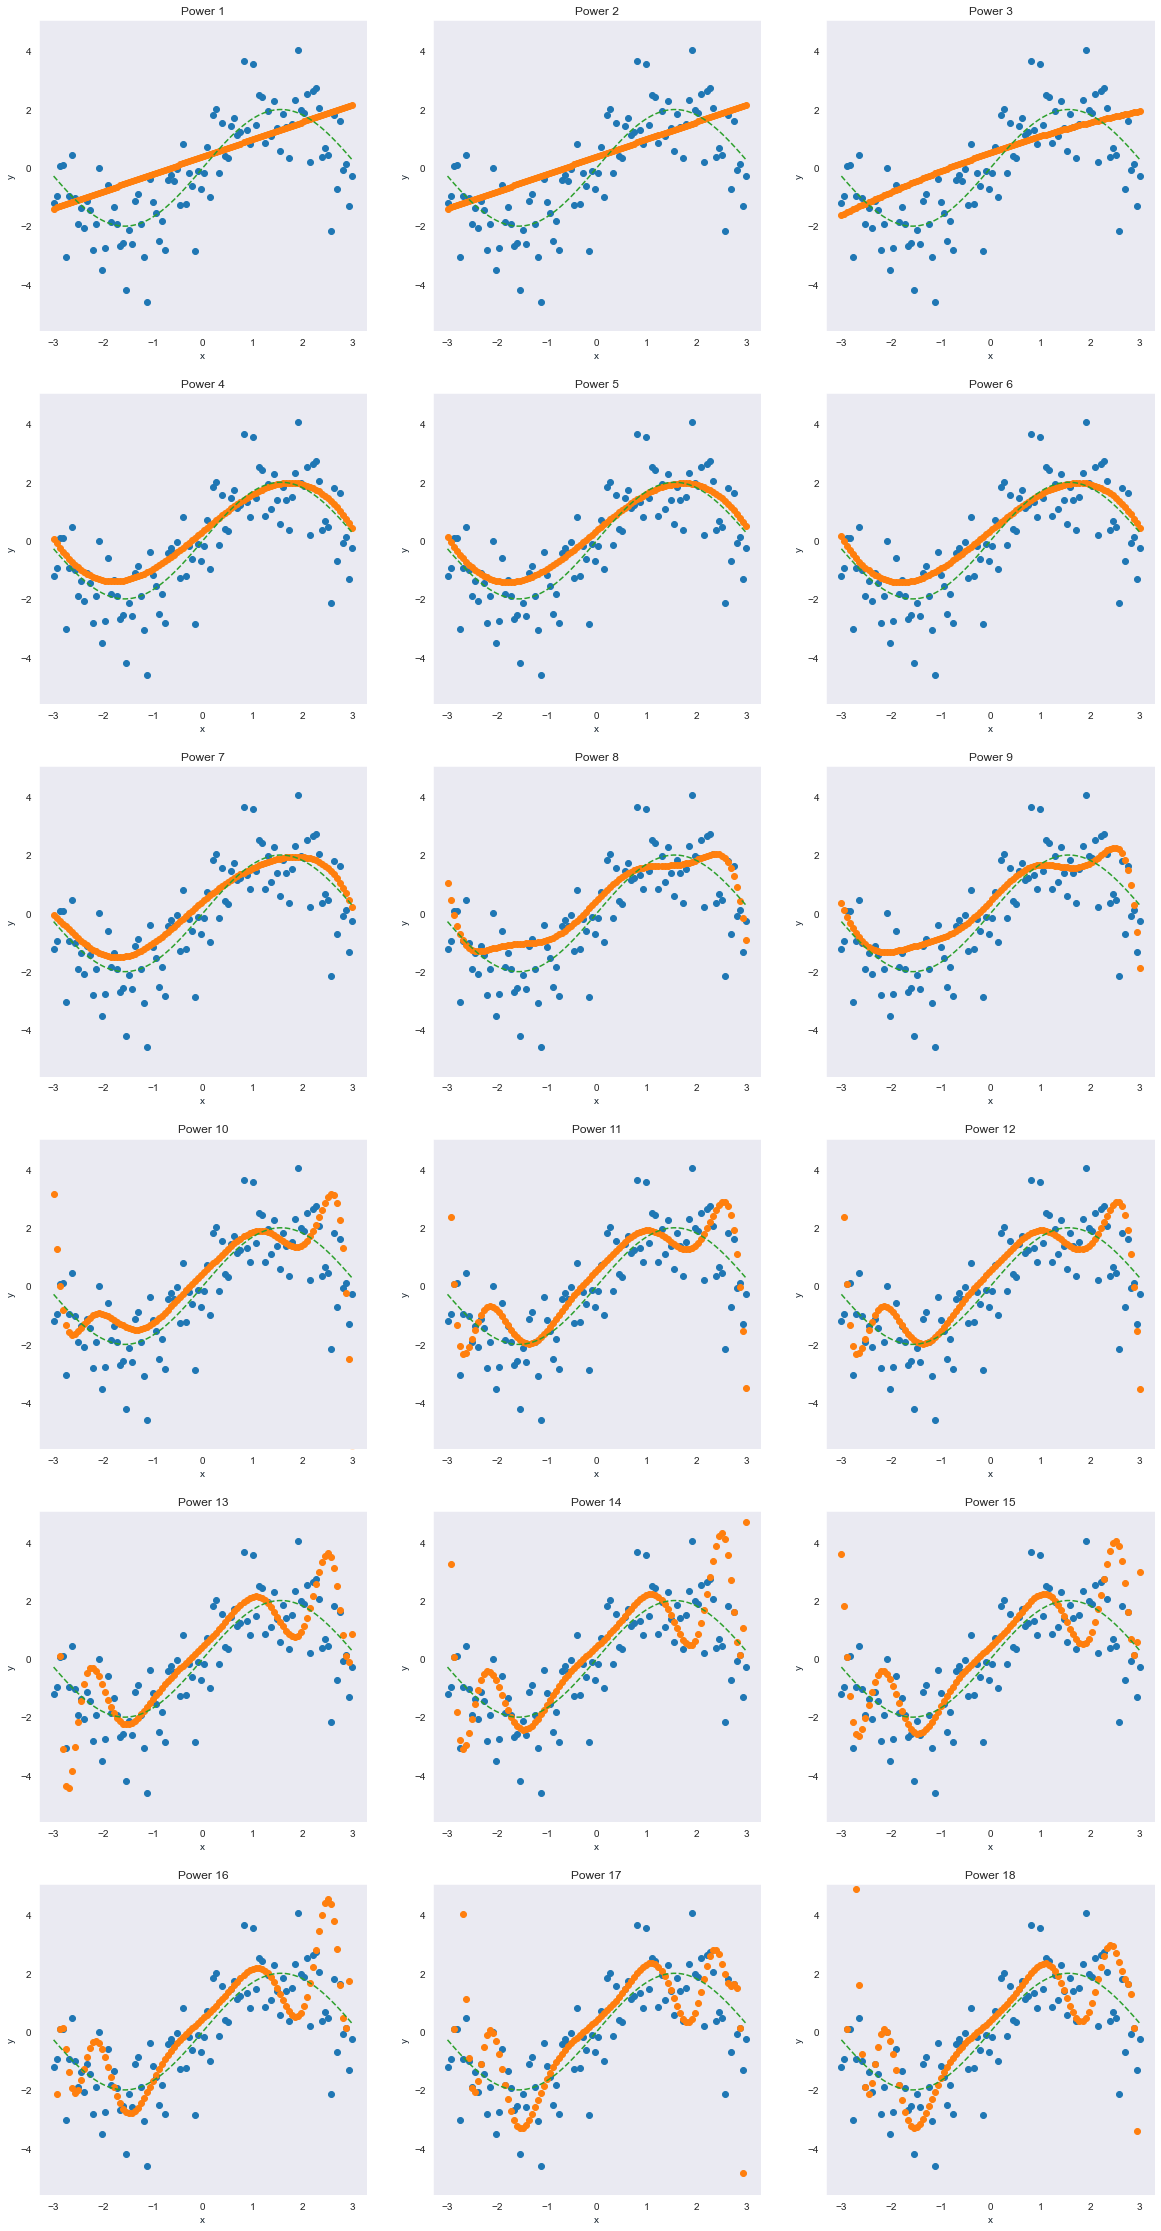

In [104]:
lmbd = 1

plt.figure(figsize=(20,40))
test_err = np.zeros(18)
train_err = np.zeros(18)
w_list = []
for p in range(18):
    X, X_train ,Y_train, X_test, Y_test = trainTestSplit(X_gen, Y, p)
    w = computePseudoInverseRegularization(X_train, Y_train, lmbd)
    w_list.append(w)
    train_err[p] = computeTestError(X_train, Y_train, w)
    test_err[p] = computeTestError(X_test, Y_test, w)
    
    X_w = np.linspace(-3,3,100)
    X_w = X_w.reshape(X_w.shape[0],1)
    X_w = addFeatures(X_w, p)
    
    plt.subplot(6,3,p+1)
    plt.grid(False)
    axes = plt.gca()
    axes.set_ylim([min(Y)-1,max(Y)+1])
    predicted = np.dot(X_w, w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X_w[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title("Power "+str(p+1))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
plt.show()

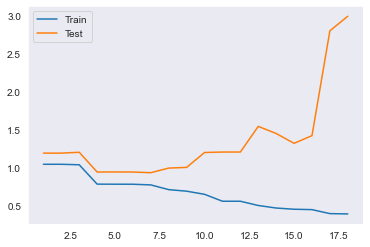

In [105]:
plt.plot(range(1, 19), train_err, label='train_error')
plt.plot(range(1, 19), test_err, label='test_error')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

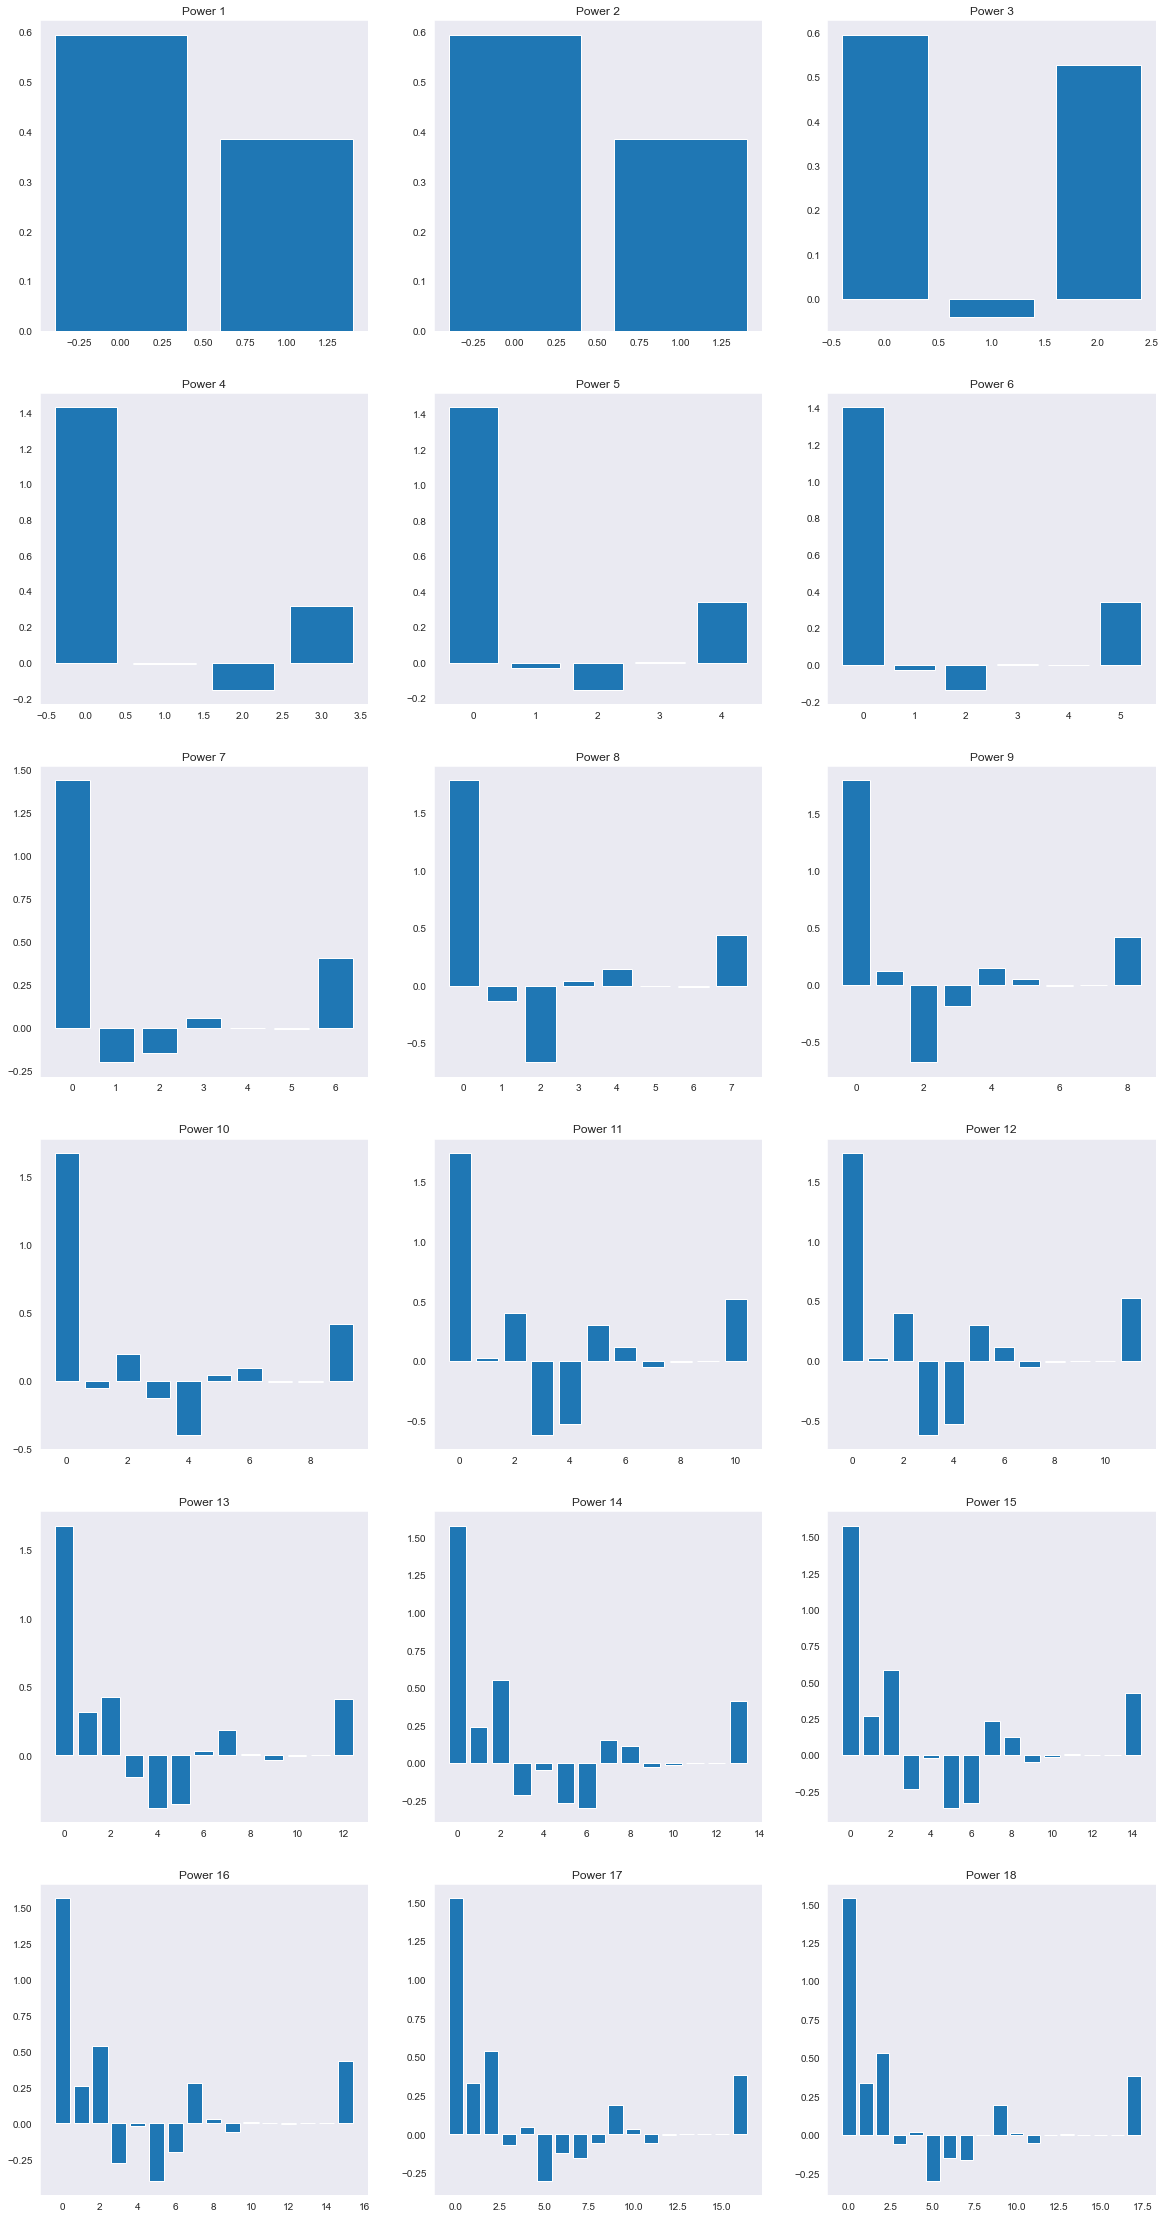

In [106]:
plt.figure(figsize=(20,40))
for p, w in enumerate(w_list):
    w = w.reshape(w.shape[0])
    
    plt.subplot(6,3,p+1)
    plt.bar(range(len(w)), w)
    plt.title("Power "+str(p+1))
plt.show()

# Dropout

Рассмотрим еще один распространенный метод борьбы с переобучением.

Допустим, у нас появилась такая немного странная задача, расширить горизонт деятельности учителей.

![title](images/dropout.jpg)

Ну например, учитель по физике - заболел. Тогда на его замену может прийти учитель математики. Аналогично, учитель по географии не смог прийти на урок - его заменил учитель по биологии.

Суть обучения в том, что мы будем обучать всех учителей всем предметам при помощи dropout. У нас как бы каждый день половина из учителей будет случайно выходить на больничный. А остальная половина пытаться заменить их. Тогда через множество дней каждый из учителей будет знать и химию, и географию, и тд...

Говоря на языке нейронных сетей, мы будем отключать случайно некоторые нейроны, и обучать нашу модель, тем самым сделав все нейроны универсальными решениями задач, а не конкретно как раньше (учитель математики - учит математики и тд).

![title](images/dropout2.jpg)